In [22]:
# !pip uninstall opencv-python
# !pip install opencv-python
from PIL import Image, ImageFilter
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import random

TAHAPAN PRE-PROCESSING
1. Tahap Resizing Gambar

In [23]:
def resize_images_from_csv(csv_file, image_dir, output_dir, target_size):
    # Membaca data dari file CSV menggunakan Pandas
    data = pd.read_csv(csv_file)

    # Membuat direktori output jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterasi melalui baris-baris data di file CSV
    for index, row in data.iterrows():
        image_filename = row['NameofFile']
        image_path = os.path.join(image_dir, image_filename)
        output_image_path = os.path.join(output_dir, image_filename)

        # Buka gambar menggunakan PIL
        image = Image.open(image_path)

        # Mengatur ukuran gambar
        resized_image = image.resize(target_size)

        # Simpan gambar yang sudah diubah ukurannya
        resized_image.save(output_image_path)

if __name__ == "__main__":
    csv_file = "D:\Kuliah\Semester 4\Satriadata\Data Train for BDC 2023 - Penyisihan\Data Train for BDC 2023 - Penyisihan\DataTrain.csv"
    image = "D:\Kuliah\Semester 4\Satriadata\Data Train for BDC 2023 - Penyisihan\Data Train for BDC 2023 - Penyisihan"
    output_resize = "D:\Kuliah\Semester 4\Satriadata\Cloning\Resizing"

    target_size = (200, 75)  # Atur ukuran target yang diinginkan
    resize_images_from_csv(csv_file, image, output_resize, target_size)

2. Tahap Enhancing Gambar

In [24]:
def enhance_dataset(input_dir, output_dir):
    # Membuat direktori output jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Mendapatkan daftar file gambar dalam direktori input
    image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Loop melalui setiap file gambar
    for file_name in image_files:
        # Menggabungkan jalur file input dan output
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, file_name)

        # Buka gambar menggunakan PIL
        image = Image.open(input_path)

        # Perbaiki kualitas citra dengan filter SHARPEN
        enhanced_image = image.filter(ImageFilter.SHARPEN)

        # Simpan gambar hasil perbaikan kualitas
        enhanced_image.save(output_path)

if __name__ == "__main__":
    input_dir = "D:\Kuliah\Semester 4\Satriadata\Cloning\Resizing"
    output_dir = "D:\Kuliah\Semester 4\Satriadata\Cloning\Enhanced"

    enhance_dataset(input_dir, output_dir)

3. Tahap pemberian efek blurring pada gambar

In [25]:
def improve_image_quality(csv_file, image_dir, output_dir):
    # Membaca data dari file CSV menggunakan Pandas
    data = pd.read_csv(csv_file)

    # Membuat direktori output jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterasi melalui baris-baris data di file CSV
    for index, row in data.iterrows():
        image_filename = row['NameofFile']
        image_path = os.path.join(image_dir, image_filename)
        output_image_path = os.path.join(output_dir, image_filename)

        # Buka gambar menggunakan PIL
        image = Image.open(image_path)

        # Menerapkan filter penghalusan untuk mengurangi blur
        smoothed_image = image.filter(ImageFilter.SMOOTH_MORE)

        # Simpan gambar yang sudah diperbaiki kualitas blurnya
        smoothed_image.save(output_image_path)

if __name__ == "__main__":
    csv_file = "D:\Kuliah\Semester 4\Satriadata\Cloning\Enhanced\DataTrain.csv"
    image_dir = "D:\Kuliah\Semester 4\Satriadata\Cloning\Enhanced"
    output_dir = "D:\Kuliah\Semester 4\Satriadata\Cloning\Blurring"

    improve_image_quality(csv_file, image_dir, output_dir)

4. Tahap mengatur kemiringan gambar

In [26]:
def rotate_image(input_dir, output_dir, angle):
    # Membuat direktori output jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Mendapatkan daftar file gambar dalam direktori input
    image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Loop melalui setiap file gambar
    for file_name in image_files:
        # Menggabungkan jalur file input dan output
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, file_name)

        # Buka gambar menggunakan PIL
        image = Image.open(input_path)

        # Lakukan rotasi pada gambar
        rotated_image = image.rotate(angle, expand=True)

        # Simpan gambar hasil rotasi
        rotated_image.save(output_path)

if __name__ == "__main__":
    input_dir = "D:\Kuliah\Semester 4\Satriadata\Cloning\Blurring"
    output_dir = "D:\Kuliah\Semester 4\Satriadata\Cloning\Rotating"
    angle = random.randint(-10, 10)

    rotate_image(input_dir, output_dir, angle)

5. Segmentasi

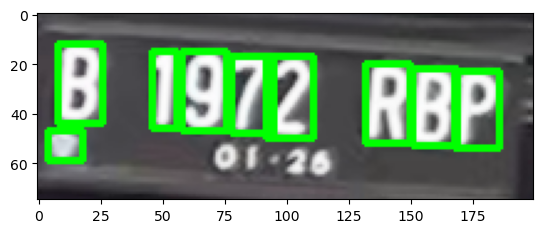

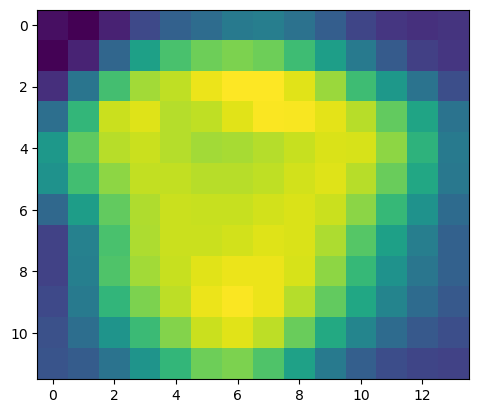

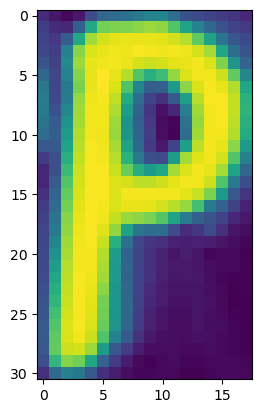

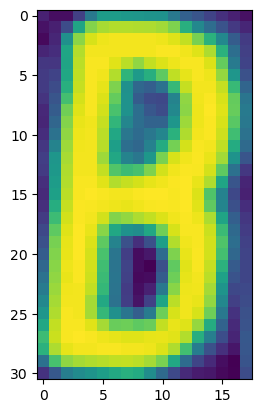

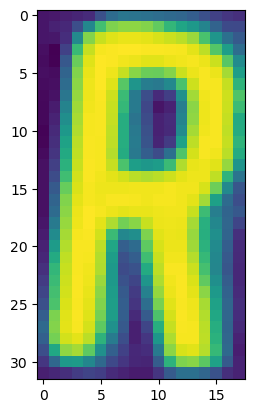

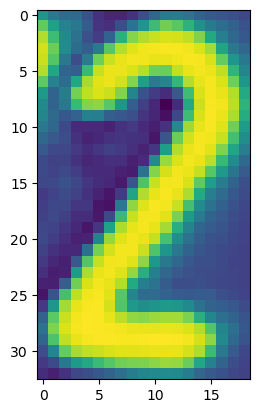

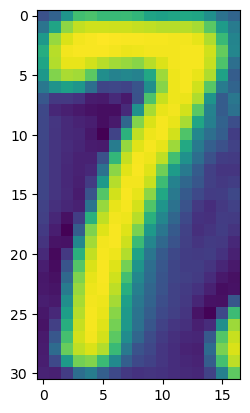

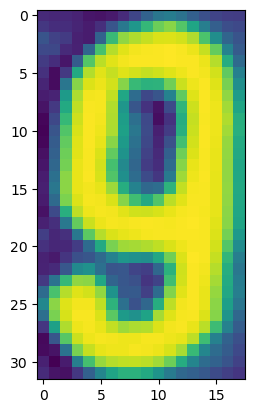

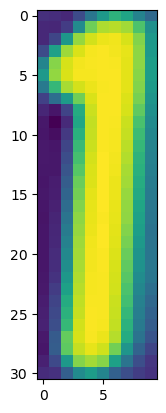

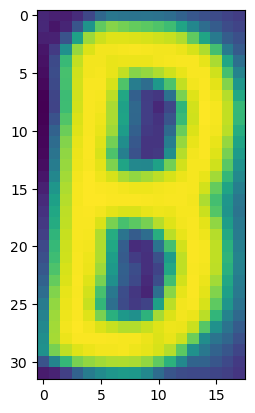

In [35]:
def detect_characters(image_path):
    # Baca gambar menggunakan OpenCV
    image = cv2.imread(image_path)

    # Ubah gambar menjadi skala abu-abu
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan filter Canny untuk mendeteksi tepi
    edged_image = cv2.Canny(gray_image, 10, 100)

    # Temukan kontur dalam gambar
    contours, _ = cv2.findContours(edged_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Inisialisasi daftar karakter terdeteksi
    detected_characters = []

    # Loop melalui setiap kontur
    for contour in contours:
        # Hitung luas kontur
        area = cv2.contourArea(contour)

        # Batasi kontur berdasarkan luas
        if area > 100:
            # Dapatkan koordinat dan ukuran persegi kontur yang melingkupi karakter
            (x, y, w, h) = cv2.boundingRect(contour)

            # Gambar persegi pada gambar asli
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Potong karakter dari gambar asli berdasarkan persegi kontur
            character = gray_image[y:y + h, x:x + w]

            # Tambahkan karakter terdeteksi ke daftar
            detected_characters.append(character)

    # Tampilkan gambar dengan persegi kotak di sekitar karakter
    plt.imshow(image)
    plt.show()

    return detected_characters

if __name__ == "__main__":
    image_path = "D:\Kuliah\Semester 4\Satriadata\Cloning\Blurring\DataTrain6.png"

    detected_characters = detect_characters(image_path)

    # Tampilkan karakter terdeteksi
    for character in detected_characters:
        plt.imshow(character)
        plt.show()


In [39]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

def detect_characters(image_folder, save_folder):
    # Create the save folder if it doesn't exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    # Read the dataset CSV file
    dataset = pd.read_csv("D:\Kuliah\Semester 4\Satriadata\Cloning\Rotating\DataTrain.csv")

    # Iterate over the rows of the dataset
    for index, row in dataset.iterrows():
        # Get the image filename from the dataset
        image_filename = row['NameofFile']

        # Construct the complete path for the image
        image_path = os.path.join(image_folder, image_filename)

        # Read the image using OpenCV
        image = cv2.imread(image_path)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply Canny edge detection
        edged_image = cv2.Canny(gray_image, 10, 100)

        # Find contours in the image
        contours, _ = cv2.findContours(edged_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Initialize the list of detected characters
        detected_characters = []

        # Loop through each contour
        for contour in contours:
            # Calculate the contour area
            area = cv2.contourArea(contour)

            # Limit the contours based on area
            if area > 100:
                # Get the coordinates and size of the bounding rectangle around the character
                (x, y, w, h) = cv2.boundingRect(contour)

                # Draw a rectangle on the original image
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

                # Crop the character from the original image based on the bounding rectangle
                character = gray_image[y:y + h, x:x + w]

                # Generate a unique filename for each segmented character image
                filename = f"character_{index}_{len(detected_characters)}.png"

                # Save the segmented character image to the specified folder
                save_path = os.path.join(save_folder, filename)
                cv2.imwrite(save_path, character)

                # Add the detected character to the list
                detected_characters.append(character)

        # # Show the image with rectangles around the characters
        # plt.imshow(image)
        # plt.show()

if __name__ == "__main__":
    image_folder = "D:\Kuliah\Semester 4\Satriadata\Cloning\Rotating"
    save_folder = "D:\Kuliah\Semester 4\Satriadata\Cloning\Segmented"

    detect_characters(image_folder, save_folder)
